#                   Как вздуться кошёлок для босс парихмахерского

Если вы владелец салона красоты вы обязательно тратите все способности
чтобы повышать приход и поднизать расход . Но самый главный это первый 
вариант.

In [22]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import classification_report
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

это для того что загрузиться пакеты которые нужны

Большенство умницы будут строить анкета чтобы собирать претензии , но умнее босс будут строить специальный анкета у которой есть вводящие вопросы которые владелец больше интересует. Такие вопросы точнее отражают воззрении клиенты , и лучше связи с статистикой . Мая исследования основать с таким данным. 

In [23]:
os.chdir('C:/Users/sonmia/Desktop')
dataset = pd.read_csv('hair_salon_no_show_wrangled_df.csv')
names = ['rencent come or not','retal or not','the cum of the last booking','the times of last book','last_cumstyle','last_cumcolor','last_cum of reatl','last_cumcancel','last_cumnoshow']
dataset.head(10)

,Unnamed: 0,book_tod,book_dow,book_category,book_staff,last_category,last_staff,last_day_services,last_receipt_tot,last_dow,...,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,noshow,recency
0,0,afternoon,Wednesday,STYLE,JJ,NaN,NaN,0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,morning,Wednesday,COLOR,JOANNE,NaN,NaN,0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,NaN,Wednesday,STYLE,JJ,COLOR,JOANNE,2,262.0,Wednesday,...,1,262,2,1,1,2,0,0,0,35
3,3,afternoon,Thursday,STYLE,KELLY,NaN,NaN,0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,evening,Saturday,STYLE,KELLY,STYLE,KELLY,1,35.0,Thursday,...,0,35,1,1,0,0,0,0,0,9
5,5,afternoon,Saturday,STYLE,KELLY,STYLE,KELLY,1,55.0,Saturday,...,0,90,2,2,0,0,0,0,0,14
6,6,afternoon,Saturday,STYLE,KELLY,STYLE,KELLY,1,35.0,Saturday,...,0,145,3,3,0,0,0,0,0,14
7,7,NaN,Saturday,STYLE,KELLY,STYLE,KELLY,1,35.0,Saturday,...,0,145,3,3,0,0,0,0,0,14
8,8,evening,Thursday,STYLE,BECKY,NaN,NaN,0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
9,9,afternoon,Friday,STYLE,BECKY,STYLE,BECKY,1,76.0,Thursday,...,1,30,1,1,0,1,0,0,0,36


В мой исследовании , чтобы отражать перекладиной результат который отражать вывод который владелец парихмахерского хочет. Я выбирал это целевое перемене— отказал ли заказ клиенты . Для владельцев меньше отказник лучше, раз уже был эти событии случились, из за чего эти происходили ？ это что владелец переживают . Кандидаты кто ? 1.Они — времени последний заказ 2. Утром днём или вечером заказал , 3.категория заказал 4 сотрудник принимал заказ 5 последная категория заказал 6.сотрудник принимал последный заказ 7.сколько типы служении были 8.сумма последних платы 9. На каком дни недели последний заказ 10. Утром днём или вечером заказал в последнем времени11.заказал ли этого клиента 12.купил ли товар 13.сумма бывших платы 14.сколько это клиент пришёл 15.число раз это клиент делал причёсок 16 .число раз это клиент красил волосы 
17.сумма бывших розницы 18 сумма отказанных заказов 19. сумма бывших заказов 20 сумма клиентов выбирал наш салон как последний заказ 21 клиенты отказал заказ ли нет 22 сколько дня до последней платы 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B832E10>,
      dtype=object)

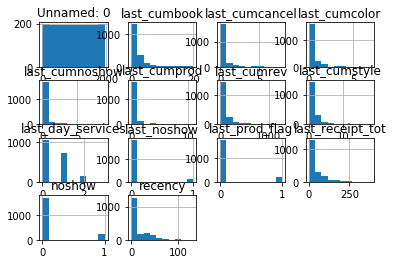

In [24]:
dataset.hist()

Text(0,0.5,'how many times this stuff privied the survies')

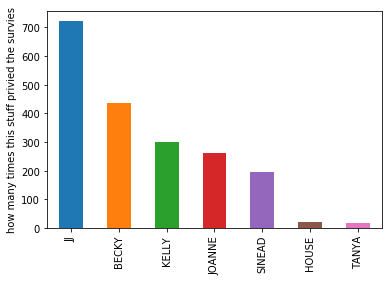

In [25]:
stuff = dataset['book_staff']
stuff.value_counts().plot(kind='bar')
plt.ylabel('how many times this stuff privied the survies') 

ис этой картинки мы знаем качесво каждых сотрудников принили заказ есль сочетал с временем сотрудникы работают
мы могут знать какой сотрудник самый трудолюбивыйю

Text(0,0.5,'the number of the clients')

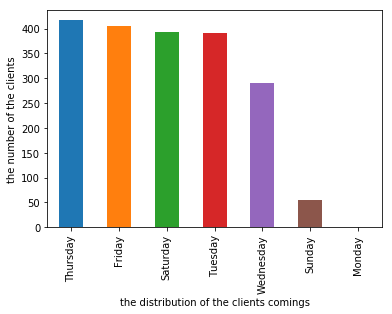

In [26]:
day = dataset['book_dow']
day.value_counts().plot(kind='bar')
plt.xlabel('the distribution of the clients comings') 
plt.ylabel('the number of the clients') 

In [27]:
for group_name, group in dataset.groupby("book_dow"):
    print(group_name, group["book_tod"].value_counts())

Friday afternoon    145
morning      110
evening      104
Name: book_tod, dtype: int64
Monday morning    1
Name: book_tod, dtype: int64
Saturday afternoon    171
morning      160
evening       11
Name: book_tod, dtype: int64
Sunday afternoon    29
morning      14
evening       5
Name: book_tod, dtype: int64
Thursday afternoon    152
evening      116
morning       99
Name: book_tod, dtype: int64
Tuesday evening      134
afternoon    117
morning       90
Name: book_tod, dtype: int64
Wednesday afternoon    121
morning       74
evening       64
Name: book_tod, dtype: int64


суббота мало клиентов пришли можно думать что то сокращать расход
например вечером сууботы может закрыть .

Text(0,0.5,'the number of the clients')

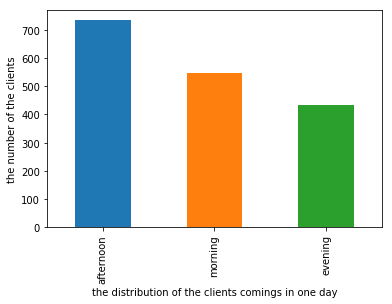

In [28]:
day = dataset['book_tod']
day.value_counts().plot(kind='bar')
plt.xlabel('the distribution of the clients comings in one day') 
plt.ylabel('the number of the clients') 

днем самая занятая время в одном дне.поэтому каникулы не должен строить днем

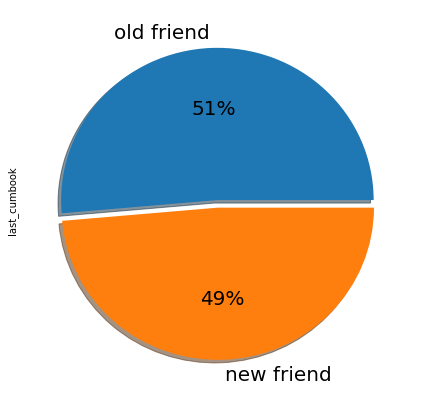

In [29]:
explode=[0,0.05]
dataset ["last_cumbook"].apply(lambda x: "old friend" if x > 0  else "new friend").value_counts().plot(kind="pie", figsize=(7, 7), fontsize=20,autopct="%.0f%%",shadow=True,explode= explode)
#dataset["last_cumbook"].value_counts()autopct="%.0f%%",explode=explode,shadow=True)

если клиенты который пришли больше 1 раза мы опредулим как старые друзья .

In [30]:
#explode=[0,0.5]
#dataset[dataset["book_category"] == 'STYLE']["noshow"].value_counts().plot(kind="pie", figsize=(7, 7), fontsize=20,autopct="%.0f%%",explode=explode,shadow=True)

In [31]:
r = 0
q = 0
w = 0
for r in y:
    if r == 0:
        q = q + 1
    else:
        w = w + 1
w

1605

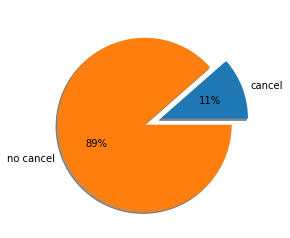

In [32]:
labes=['cancel','no cancel']
fracs=[224,1728]
explode=[0,0.2]
plt.axes(aspect=1)
plt.pie(x=fracs,labels=labes,autopct="%.0f%%",explode=explode,shadow=True)
plt.show()

11% клиенты есть запис отказ 

In [33]:
for group_name, group in dataset.groupby("book_category"):
    print(group_name, group["noshow"].value_counts())

COLOR 0    304
1     43
Name: noshow, dtype: int64
MISC 0    63
1    11
Name: noshow, dtype: int64
STYLE 0    1361
1     170
Name: noshow, dtype: int64


C:\Users\sonmia\Anaconda3\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)
C:\Users\sonmia\Anaconda3\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)
No handles with labels found to put in legend.


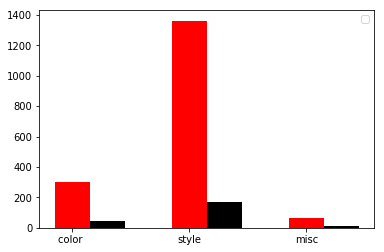

In [34]:
y=[304,1361,63]
y1=[43,170,11]
x=['color ','style','misc']

index=np.arange(3)
plt.bar(left = x,height=y,color='red',width=0.3)
plt.bar(left = index + 0.3,height=y1,color='black',width=0.3)
plt.legend()
plt.show()


из этой картинки мы можем знать отказ причётки больше чем красиние потщму что клиенты больще делают причетку.поэтому мы сравняем прецент отказа.
причетка - 11.2% красиние -12.4%  выгладит причиние отказа не вида слушения.

Text(0,0.5,'boolking')

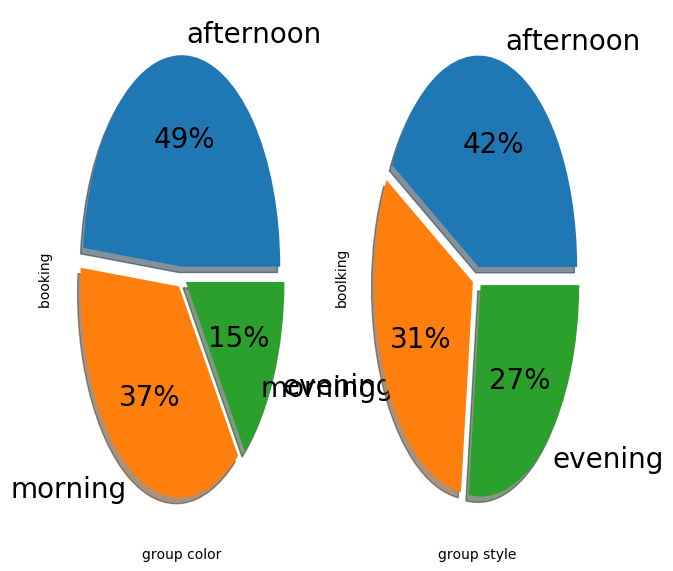

In [35]:
fig, axes = plt.subplots(figsize=(12,3), dpi=100)
plt.subplot(1, 2, 1)
explode=[0.05,0.05,0.05]
dataset[dataset["book_category"] == 'COLOR']["book_tod"].value_counts().plot(kind="pie", figsize=(7, 7), fontsize=20,autopct="%.0f%%",explode=explode,shadow=True)
plt.xlabel('group color')
plt.ylabel('booking ')
plt.subplot(1, 2, 2)
explode=[0.05,0.05,0.05]
dataset[dataset["book_category"] == 'STYLE']["book_tod"].value_counts().plot(kind="pie", figsize=(7, 7), fontsize=20,autopct="%.0f%%",explode=explode,shadow=True)
plt.xlabel('group style')
plt.ylabel('boolking')

основить на этих картинках мы можем устроить расптсанию по служению.

Text(0,0.5,'booking ')

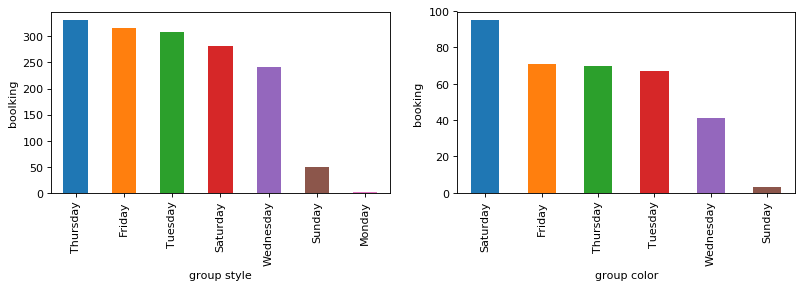

In [36]:
fig, axes = plt.subplots(figsize=(12,3), dpi=80)
plt.subplot(1, 2, 1)
dataset[dataset["book_category"] == 'STYLE']["book_dow"].value_counts().plot(kind='bar')
plt.xlabel('group style')
plt.ylabel('boolking')
plt.subplot(1, 2, 2)
dataset[dataset["book_category"] == 'COLOR']["book_dow"].value_counts().plot(kind='bar')
plt.xlabel('group color')
plt.ylabel('booking ')

 тоже основить на этих картинках мы можем устроить расптсанию по служению но это по дню недели


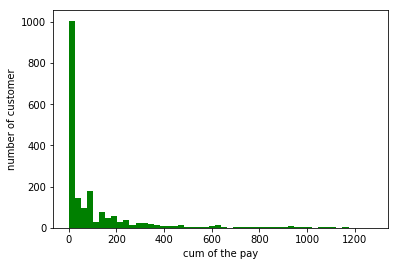

In [37]:
с=dataset['last_cumrev'].values
plt.hist(с,50,color="green")
plt.xlabel('cum of the pay')  
plt.ylabel('number of customer')
plt.show()

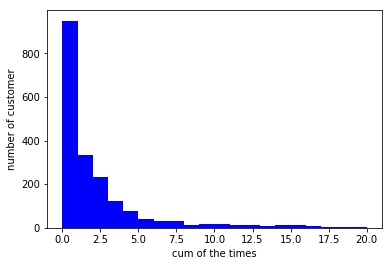

In [38]:

с=dataset['last_cumbook'].values
plt.hist(с,20,color="blue")
plt.xlabel('cum of the times')  
plt.ylabel('number of customer')
plt.show()

In [39]:
#dataset.groupby("last_category").agg({"last_receipt_tot": np.sum})
dataset.groupby("last_dow")["last_receipt_tot"].agg(["sum", "max", "mean",'std'])


,sum,max,mean,std
last_dow,,,,
Friday,15282.80,300.0,70.104587,65.353093
Monday,60.00,60.0,60.000000,NaN
Saturday,14297.79,382.8,82.646185,82.418673
Sunday,2363.20,306.1,76.232258,82.254594
Thursday,15857.95,260.0,72.081591,65.853928
Tuesday,11636.29,287.0,58.181450,58.098627
Wednesday,10349.76,262.0,64.686000,57.771361


это торговый оборот по дню недели сумма максим средный и тд 

In [40]:
dataset.groupby("last_category").agg({"last_receipt_tot": np.sum})

,last_receipt_tot
last_category,
COLOR,26877.91
MISC,548.70
STYLE,42421.18


это торговый оборот по виде служению .

In [41]:
for group_name, group in dataset.groupby("last_staff"):
    print(group_name, group["last_category"].nunique()) 

BECKY 3
HOUSE 2
JJ 3
JOANNE 3
KELLY 3
SINEAD 3
TANYA 1


In [42]:
dataset.groupby("last_staff")["last_receipt_tot"].agg(["sum", "max", "mean",'std'])

,sum,max,mean,std
last_staff,,,,
BECKY,8580.90,230.0,37.635526,35.896986
HOUSE,3695.00,260.0,230.937500,62.615726
JJ,22964.16,306.1,64.687775,47.689483
JOANNE,22114.90,382.8,130.857396,84.568213
KELLY,6182.95,339.0,63.741753,77.330809
SINEAD,6259.88,230.0,46.715522,38.874758
TANYA,50.00,35.0,12.500000,16.583124


это торговый оборот по разним струдниками сумма максим средный и тд

In [43]:
dataset.groupby("last_staff")["last_cumnoshow"].agg(["min", "max", "mean",'std'])

,min,max,mean,std
last_staff,,,,
BECKY,0,9,1.478070,2.417712
HOUSE,0,5,2.250000,2.435843
JJ,0,8,0.546479,1.367483
JOANNE,0,7,0.662722,1.534863
KELLY,0,3,0.422680,0.839581
SINEAD,0,7,0.783582,1.614604
TANYA,0,0,0.000000,0.000000


эта статистика что сколько дня до последней платы. это можно оценавать 
кальчество служения этого клиента.

In [44]:
X = dataset[['last_cumrev','last_noshow']].values
y = dataset['book_category'].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
y[:3]
dataset_pred_names = le.classes_
dataset_pred_names

array(['COLOR', 'MISC', 'STYLE'], dtype=object)

In [45]:
clf = DecisionTreeClassifier(max_depth=3)
#拟合模型
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

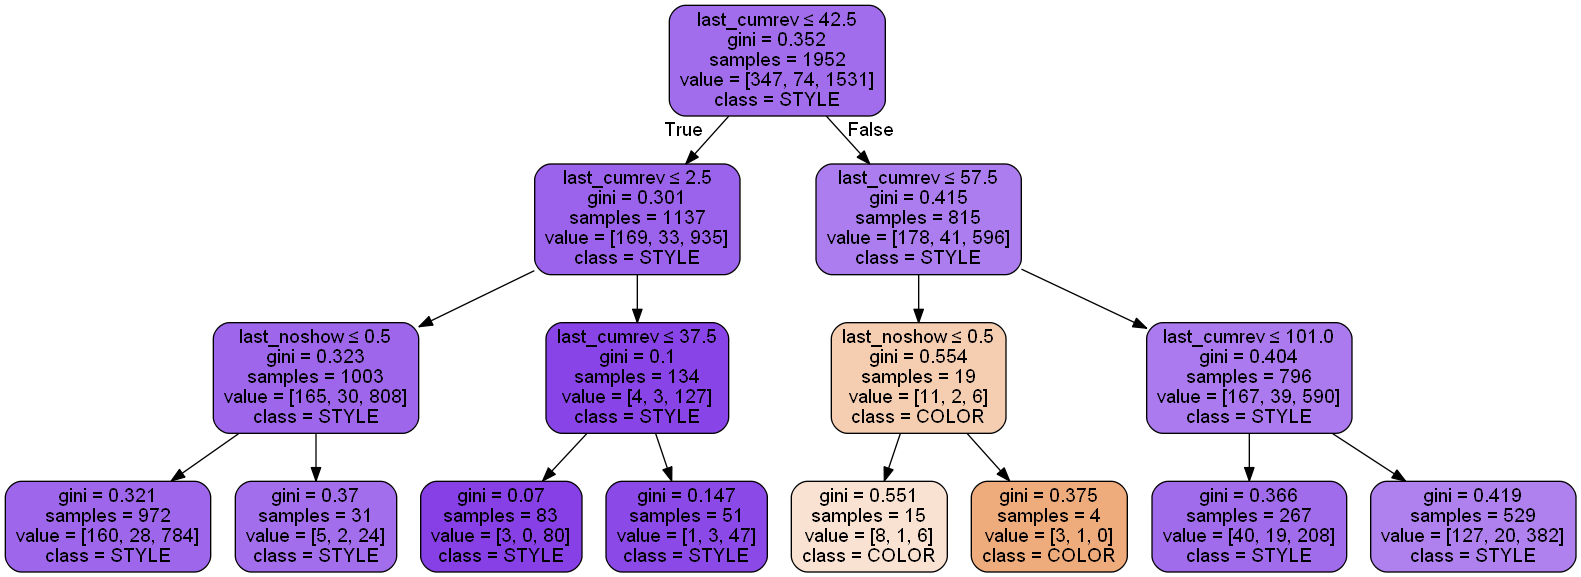

In [46]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['last_cumrev','last_noshow'],  
                         class_names=dataset_pred_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

из этого дерева ме можем наити что клиенты больше приклоняются на что делают причёску в этом салонею
клиенты которые тратли много в этом салоне тоже любят делают причёску.
ктому нравиться красит волос? это клиенты которые тратли примерно 60
индех gini не очень низкий но может справлять.

In [47]:
X = dataset.iloc[:, 11:20].values
y = dataset['noshow'].values

ПЕРЕМЕНИИ КОТОРЫИ Я ВЫБИРАЛ :10. Утром днём или вечером заказал в последнем времени11.заказал ли этого клиента 12.купил ли товар 13.сумма бывших платы 14.сколько это клиент пришёл 15.число раз это клиент делал причёсок 16 .число раз это клиент красил волосы 17.сумма бывших розницы 18 сумма отказанных заказов 19. сумма бывших заказов 20 сумма клиентов выбирал наш салон как последний заказ
и поверит если ли взаимосвязь с этим переменной  "клиенты отказал заказ ли нет"         чтобы найти пртчинии которыи вызывают клиенты отказал заказы.

можно замечал большенство клиенты новые 

можем замечал только %11 клиенты есть записи был заказать это соотствено к ситуации что большенство клиенты новые.

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# чтобы найти взаимосвязь я исполизовал способ --Ансамбли.

найти модель чтобы найти самый позитивная и пегативная  переменая 
что дальще после того получил эти перемении мы может знаить как эти перемении мешають клиенты решению -- жоловал ли нет.  

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# логистическая регрессия
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.8816295157571099, 0.8847926267281107)

In [50]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9377401998462721, 0.8786482334869432)

In [51]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
modelBag = BaggingClassifier(base_estimator=logreg, n_estimators=100, random_state=5)
modelBag.fit(X_train, y_train)
modelBag.score(X_train, y_train), modelBag.score(X_test, y_test)

(0.883935434281322, 0.8847926267281107)

In [52]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=100, max_features=5)
modelRF.fit(X_train, y_train)
modelRF.score(X_train, y_train), modelRF.score(X_test, y_test)

(0.9377401998462721, 0.8940092165898618)

In [53]:
from sklearn.ensemble import AdaBoostClassifier
modelAB = AdaBoostClassifier(base_estimator=logreg, n_estimators=100)
modelAB.fit(X_train, y_train)
modelAB.score(X_train, y_train), modelAB.score(X_test, y_test)

(0.8816295157571099, 0.8863287250384024)

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
modelGB = GradientBoostingClassifier(n_estimators=100)
modelGB.fit(X_train, y_train)
modelGB.score(X_train, y_train), modelGB.score(X_test, y_test)

(0.921598770176787, 0.8832565284178188)

In [55]:
pred1_train = pd.DataFrame(modelGB.predict(X_train))
pred2_train = pd.DataFrame(modelBag.predict(X_train))
pred3_train = pd.DataFrame(modelRF.predict(X_train))

pred1_test = pd.DataFrame(modelGB.predict(X_test))
pred2_test = pd.DataFrame(modelBag.predict(X_test))
pred3_test = pd.DataFrame(modelRF.predict(X_test))

data_train = pd.concat([pred1_train, pred2_train, pred3_train], axis=1)
data_test = pd.concat([pred1_test, pred2_test, pred3_test], axis=1)

modelSt = LogisticRegression()
modelSt.fit(data_train,y_train)
modelSt.score(data_train, y_train), modelSt.score(data_test, y_test)

(0.9377401998462721, 0.8940092165898618)

он строится из GradientBoostingClassifier. RandomForestClassifier и BaggingClassifier.LogisticRegression

были использованы в качестве основы.чериз оценка каждых моделей выбирал 3 самыи высокии баллов из 5 моделей .

In [56]:
tree.feature_importances_

array([0.02144048, 0.02963546, 0.33653527, 0.0769926 , 0.18593045,
       0.0741587 , 0.02516212, 0.05956704, 0.19057788])

сейчас мы получили модель .

In [57]:
names
names[0:10]

['rencent come or not',
 'retal or not',
 'the cum of the last booking',
 'the times of last book',
 'last_cumstyle',
 'last_cumcolor',
 'last_cum of reatl',
 'last_cumcancel',
 'last_cumnoshow']

сочитает с кодом верх мошем знаеть самая важная переменая --the cum of the before booking

In [58]:
import eli5
feat_imp_tree = eli5.explain_weights_df(tree, feature_names=names[0:10])
feat_imp_tree

,feature,weight
0,the cum of the last booking,0.336535
1,last_cumnoshow,0.190578
2,last_cumstyle,0.185930
3,the times of last book,0.076993
4,last_cumcolor,0.074159
5,last_cumcancel,0.059567
6,retal or not,0.029635
7,last_cum of reatl,0.025162
8,rencent come or not,0.021440


сейчас мы знаем какие перемении высокий вес права но не знаем активный или пассивный. поэтому дальше

In [59]:
eli5.explain_weights_df(modelRF, feature_names=names[0:10])

,feature,weight,std
0,the cum of the last booking,0.356185,0.058160
1,last_cumnoshow,0.131148,0.059777
2,the times of last book,0.125379,0.044655
3,last_cumstyle,0.120466,0.050099
4,last_cumcolor,0.076578,0.031764
5,last_cumcancel,0.072452,0.030869
6,last_cum of reatl,0.065577,0.039768
7,rencent come or not,0.031822,0.028731
8,retal or not,0.020393,0.015152


In [60]:
modelRF.feature_importances_

array([0.03182199, 0.02039305, 0.35618495, 0.12537907, 0.1204658 ,
       0.07657827, 0.06557725, 0.07245197, 0.13114764])

In [61]:
names
names[0:10]

['rencent come or not',
 'retal or not',
 'the cum of the last booking',
 'the times of last book',
 'last_cumstyle',
 'last_cumcolor',
 'last_cum of reatl',
 'last_cumcancel',
 'last_cumnoshow']

сравнит с резцльтатом другого способа -- randomforest

In [62]:
all_features = pd.DataFrame(data=[tree.feature_importances_ for tree in modelRF],columns=names[0:10])

In [63]:
all_features.head(2)

,rencent come or not,retal or not,the cum of the last booking,the times of last book,last_cumstyle,last_cumcolor,last_cum of reatl,last_cumcancel,last_cumnoshow
0,0.061050,0.021014,0.462287,0.112616,0.065033,0.080401,0.078243,0.095795,0.023561
1,0.002684,0.064026,0.474522,0.046222,0.099338,0.072746,0.022854,0.069577,0.148033


In [64]:
all_features.mean()

rencent come or not            0.031822
retal or not                   0.020393
the cum of the last booking    0.356185
the times of last book         0.125379
last_cumstyle                  0.120466
last_cumcolor                  0.076578
last_cum of reatl              0.065577
last_cumcancel                 0.072452
last_cumnoshow                 0.131148
dtype: float64

In [65]:
all_features.std()

rencent come or not            0.028876
retal or not                   0.015228
the cum of the last booking    0.058453
the times of last book         0.044880
last_cumstyle                  0.050351
last_cumcolor                  0.031924
last_cum of reatl              0.039969
last_cumcancel                 0.031024
last_cumnoshow                 0.060078
dtype: float64

In [66]:
eli5.explain_weights_df(logreg, feature_names=names[0:10])

,target,feature,weight
0,1,rencent come or not,1.039578
1,1,last_cumcancel,0.597399
2,1,last_cumstyle,0.455524
3,1,retal or not,0.232455
4,1,last_cumcolor,0.024803
5,1,the cum of the last booking,0.006791
6,1,last_cum of reatl,-0.070582
7,1,last_cumnoshow,-0.196374
8,1,the times of last book,-0.786944
9,1,<BIAS>,-2.275427


In [67]:
logreg.coef_

array([[ 1.03957822,  0.2324546 ,  0.00679068, -0.78694391,  0.45552442,
         0.02480266, -0.07058209,  0.59739917, -0.19637423]])

сравнит с резцльтатом другого способа -- LogisticRegression

In [68]:
logreg.intercept_

array([-2.27542706])

In [69]:
eli5.explain_weights_df(modelGB, feature_names=names[0:10])

,feature,weight,std
0,the cum of the last booking,0.343997,0.231750
1,last_cumstyle,0.184735,0.226337
2,the times of last book,0.152102,0.190874
3,last_cumnoshow,0.142116,0.163335
4,last_cum of reatl,0.049078,0.096006
5,rencent come or not,0.048978,0.124600
6,last_cumcolor,0.042473,0.075057
7,last_cumcancel,0.035930,0.090337
8,retal or not,0.000590,0.005867


In [70]:
eli5.explain_weights_df(modelSt, feature_names=['GB', 'Bag', 'RF']) 

,target,feature,weight
0,1,RF,4.264057
1,1,GB,1.657809
2,1,Bag,-0.110941
3,1,<BIAS>,-2.576785


в этом таплеке можем найти самый высокий вес права в Ансамбли

In [71]:
from eli5.sklearn import PermutationImportance
permAB = PermutationImportance(modelAB).fit(X_test, y_test)
eli5.explain_weights_df(permAB, feature_names=names[0:10])

,feature,weight,std
0,the cum of the last booking,0.046083,0.004122
1,the times of last book,0.043318,0.004598
2,last_cumstyle,0.028571,0.002084
3,last_cumcancel,0.011674,0.002849
4,last_cumcolor,0.002151,0.000753
5,last_cumnoshow,0.001229,0.000614
6,last_cum of reatl,0.000307,0.000614
7,retal or not,0.000307,0.000614
8,rencent come or not,-0.000614,0.001229


In [72]:
eli5.show_weights(permAB)

Weight,Feature
0.0461 ± 0.0082,x2
0.0433 ± 0.0092,x3
0.0286 ± 0.0042,x4
0.0117 ± 0.0057,x7
0.0022 ± 0.0015,x5
0.0012 ± 0.0012,x8
0.0003 ± 0.0012,x6
0.0003 ± 0.0012,x1
-0.0006 ± 0.0025,x0


In [73]:
eli5.show_weights(permAB, feature_names=names[0:10])

Weight,Feature
0.0461 ± 0.0082,the cum of the last booking
0.0433 ± 0.0092,the times of last book
0.0286 ± 0.0042,last_cumstyle
0.0117 ± 0.0057,last_cumcancel
0.0022 ± 0.0015,last_cumcolor
0.0012 ± 0.0012,last_cumnoshow
0.0003 ± 0.0012,last_cum of reatl
0.0003 ± 0.0012,retal or not
-0.0006 ± 0.0025,rencent come or not


In [74]:
permRF = PermutationImportance(modelRF).fit(X_test, y_test)
eli5.show_weights(permRF, feature_names=names[0:10])

Weight,Feature
0.0630 ± 0.0160,the cum of the last booking
0.0120 ± 0.0036,the times of last book
0.0104 ± 0.0030,last_cumcancel
0.0092 ± 0.0027,rencent come or not
0.0086 ± 0.0060,last_cumnoshow
0.0046 ± 0.0048,last_cumcolor
0.0040 ± 0.0037,last_cum of reatl
0.0037 ± 0.0015,last_cumstyle
0 ± 0.0000,retal or not


показает  разниц способ randomforest и AdaBoost

In [75]:
from eli5.permutation_importance import get_score_importances
def score(X, y):
    pred1 = pd.DataFrame(modelGB.predict(X))
    pred2 = pd.DataFrame(modelBag.predict(X))
    pred3 = pd.DataFrame(modelRF.predict(X))

    dataX = pd.concat([pred1, pred2, pred3], axis=1)
    return modelSt.score(dataX, y)
base_score, score_decreases = get_score_importances(score, X_test, y_test)
feature_importances = np.mean(score_decreases, axis=0)
feature_importances

array([0.00768049, 0.00061444, 0.06113671, 0.01136713, 0.00122888,
       0.00675883, 0.00460829, 0.00952381, 0.01136713])

еще одна способ показает вес

In [76]:
import lime
from lime.lime_tabular import LimeTabularExplainer

In [77]:
explainer = LimeTabularExplainer(X_train, mode='classification', 
                                 feature_names=names[0:10])

C:\Users\sonmia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [78]:
exp = explainer.explain_instance(X_test[4,:], 
                                 modelBag.predict_proba)

из этой картины мы не только читали вес права у каждые перемении но и знали пассивный и поситивный. зелёный -- поситивный красний -- пассивный  

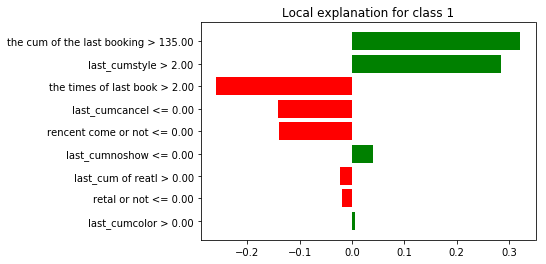

In [81]:
exp.as_pyplot_figure();

вывод похожи the cum of the last booking last_cumstyle самое важное влияние.что ьы можем дальше знаем,? вывод уже есть б но что надо делать есль владец салона? больше раз клиенты пришелы и тратили больше денеги больше вожможности жоловаюся это бывают но владец еще надо обрать винимани на это . чтобы держить старые друзья. 

In [82]:
exp.show_in_notebook()

по этому способу the cum of the last booking last_cumstyle тоже самые важные переменые

In [83]:
test_ex = X_test[4:5,:]
test_ex

array([[  0,   0, 402,   7,   6,   1,   3,   0,   0]], dtype=int64)

вроверит наш вывод .

In [84]:
print('Увеличим число last_cum')
temp = test_ex.copy()
print('P( есть) до:', modelBag.predict_proba(temp)[0,1])
temp[0,0] = 2
print('P( есть) после:', modelBag.predict_proba(temp)[0,1])
print ()

Увеличим число last_cum
P( есть) до: 0.07359036228403883
P( есть) после: 0.40831382337981315



In [86]:
modelBag.predict_proba(X_test[4:5,:])[0,1]

0.07359036228403883